Загрузка

In [1]:
import pandas as pd
import numpy as np

In [2]:
import sqlite3
print(sqlite3.sqlite_version)

3.29.0


In [3]:
data = pd.read_csv('/Users/annie/github/kaggle_ecommerce_data.csv', encoding='cp1252')

In [61]:
data.tail(25)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541884,581585,84946,ANTIQUE SILVER T-LIGHT GLASS,12,2011-12-09 12:31:00,1.25,15804.0,United Kingdom
541885,581585,21684,SMALL MEDINA STAMPED METAL BOWL,12,2011-12-09 12:31:00,0.85,15804.0,United Kingdom
541886,581585,22398,MAGNETS PACK OF 4 SWALLOWS,12,2011-12-09 12:31:00,0.39,15804.0,United Kingdom
541887,581585,23328,SET 6 SCHOOL MILK BOTTLES IN CRATE,4,2011-12-09 12:31:00,3.75,15804.0,United Kingdom
541888,581585,23145,ZINC T-LIGHT HOLDER STAR LARGE,12,2011-12-09 12:31:00,0.95,15804.0,United Kingdom
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom
541893,581586,20685,DOORMAT RED RETROSPOT,10,2011-12-09 12:49:00,7.08,13113.0,United Kingdom


In [5]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'],format='%m/%d/%Y %H:%M')

In [6]:
conn = sqlite3.connect('db')
cur = conn.cursor()

In [7]:
def select(sql):
  return pd.read_sql(sql, conn)

In [8]:
data.to_sql('ecommerce', conn, index=False)

In [9]:
sql = '''select count(*) from ecommerce t'''
print(select(sql), len(data))

   count(*)
0    541909 541909


In [10]:
type(select(sql))

pandas.core.frame.DataFrame

In [11]:
sql = '''select * from ecommerce t limit 5'''
select(sql)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [12]:
select(sql).dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

Анализ - RFM сегментация:
R - как давно (1-4 балла),
F - как часто (1-4 балла),
M - как много (1-4 балла)

RFM_score = (R+F+M) / 3 или создание кластеров, 

In [13]:
sql = '''select

date(t.InvoiceDate,'start of month'),
count(*)

from ecommerce t 
group by date(t.InvoiceDate,'start of month')
order by date(t.InvoiceDate,'start of month')
'''
select(sql)

,"date(t.InvoiceDate,'start of month')",count(*)
0,2010-12-01,42481
1,2011-01-01,35147
2,2011-02-01,27707
3,2011-03-01,36748
4,2011-04-01,29916
5,2011-05-01,37030
6,2011-06-01,36874
7,2011-07-01,39518
8,2011-08-01,35284
9,2011-09-01,50226


In [37]:
sql = '''select

t.CustomerID, 
min(t.InvoiceDate) as reg_date,
sum(t.Quantity * t.UnitPrice) as revenue

from ecommerce t 
where date(t.InvoiceDate,'start of month') <= '2011-10-01'
and t.CustomerID is not null
group by t.CustomerID
'''
t = select(sql)

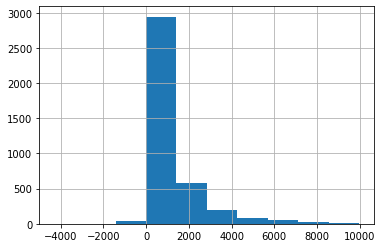

In [38]:
t[t['revenue'] < 10000]['revenue'].hist()

In [39]:
len(t[t['revenue'] < 10000]['revenue']) / len(t)

0.9812967581047382

In [70]:
sql = '''
drop table if exists customer; 
create table customer as 
select *, 
date('2011-11-01') as month,
julianday(date('2011-11-01')) - julianday(last_purchase) as R

from 
(select 
t.CustomerID, 
min(t.InvoiceDate) as reg_date,
max(t.InvoiceDate) as last_purchase,
sum(t.Quantity * t.UnitPrice) as M,
count(distinct t.InvoiceNo) as F

from ecommerce t 
where date(t.InvoiceDate,'start of month') <= '2011-10-01'
and t.CustomerID is not null
group by t.CustomerID
having M < 10000)
'''
cur.executescript(sql)

In [88]:
sql = ''' select * from customer t'''
t = select(sql)
t.sample(5)

,CustomerID,reg_date,last_purchase,M,F,month,R
1255,14215.0,2010-12-06 15:34:00,2011-09-23 10:44:00,1332.11,6,2011-11-01,38.552778
2684,16360.0,2011-09-12 13:50:00,2011-10-04 12:22:00,1481.98,3,2011-11-01,27.484722
905,13685.0,2011-10-10 12:59:00,2011-10-25 13:14:00,1934.45,3,2011-11-01,6.448611
961,13769.0,2010-12-07 13:28:00,2011-09-08 13:55:00,2153.67,13,2011-11-01,53.420139
3711,17946.0,2011-03-25 14:34:00,2011-04-20 17:00:00,149.58,2,2011-11-01,194.291667


In [92]:
t['R_score'] = 4 - pd.qcut(t['R'], 4, labels = False)
t.groupby(by = 'R_score')['R'].agg(['min', 'count'])

,min,count
R_score,,
1,153.446528,984
2,52.550694,983
3,20.316667,984
4,0.282639,984


In [104]:
t['M_score'] = pd.qcut(t['M'], 4, labels = False) + 1
t.groupby(by = 'M_score')['M'].agg(['mean', 'count'])

,mean,count
M_score,,
1,138.807317,984
2,401.886477,984
3,894.042645,983
4,3012.871109,984


In [97]:
t['F'].value_counts()[:10]

1     1339
2      777
3      461
4      317
5      262
6      152
7      115
8       96
9       66
10      62
Name: F, dtype: int64

In [98]:
t['F_score'] = pd.qcut(t['F'], 4, labels = False, duplicates = 'drop') + 1
t.groupby(by = 'F_score')['F'].agg(['min', 'count'])

,min,count
F_score,,
1,1,2116
2,3,1040
3,6,779


In [99]:
t.groupby(by = 'F_score')['F'].agg(set)

F_score
1                                               {1, 2}
2                                            {3, 4, 5}
3    {6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 1...
Name: F, dtype: object

In [100]:
def get_F(x):
    if x == 1:
        return 1
    if x in [2,3]:
        return 2
    if x in [4,5,6]:
        return 3
    return 4

In [103]:
t['F_score'] = t['F'].apply(get_F)
t.groupby(by = 'F_score')['F'].agg(['min', 'count'])

,min,count
F_score,,
1,1,1339
2,2,1238
3,4,731
4,7,627


In [109]:
t['RFM_score'] = t['R_score'] + t['F_score'] + t['M_score']
t.sample(5)

,CustomerID,reg_date,last_purchase,M,F,month,R,R_score,M_score,F_score,RFM_score
2118,15511.0,2011-09-15 15:05:00,2011-10-20 15:15:00,514.50,3,2011-11-01,11.364583,4,2,2,8
166,12581.0,2011-10-31 08:56:00,2011-10-31 08:56:00,197.71,1,2011-11-01,0.627778,4,1,1,6
3914,18256.0,2010-12-20 08:27:00,2010-12-20 08:27:00,-50.10,1,2011-11-01,315.647917,1,1,1,3
2182,15609.0,2011-06-08 13:00:00,2011-06-10 09:55:00,270.03,2,2011-11-01,143.586806,2,2,2,6
1781,15030.0,2011-03-16 15:34:00,2011-09-29 10:50:00,518.28,2,2011-11-01,32.548611,3,2,2,7


Итого: сегментация, https://towardsdatascience.com/recency-frequency-monetary-model-with-python-and-how-sephora-uses-it-to-optimize-their-google-d6a0707c5f17

In [110]:
t.sort_values('RFM_score', ascending = False).head(10)

,CustomerID,reg_date,last_purchase,M,F,month,R,R_score,M_score,F_score,RFM_score
1172,14085.0,2010-12-06 12:39:00,2011-10-25 16:20:00,3525.98,15,2011-11-01,6.319444,4,4,4,12
1187,14112.0,2011-03-09 11:28:00,2011-10-30 16:00:00,2613.15,10,2011-11-01,1.333333,4,4,4,12
2113,15505.0,2011-07-07 13:33:00,2011-10-18 07:56:00,3497.14,7,2011-11-01,13.669444,4,4,4,12
2098,15482.0,2010-12-16 10:08:00,2011-10-25 17:32:00,2503.50,8,2011-11-01,6.269444,4,4,4,12
3337,17365.0,2011-01-11 12:11:00,2011-10-20 12:07:00,4375.19,7,2011-11-01,11.495139,4,4,4,12
757,13468.0,2010-12-01 15:08:00,2011-10-12 14:10:00,5049.45,35,2011-11-01,19.409722,4,4,4,12
1176,14099.0,2010-12-20 11:14:00,2011-10-27 13:41:00,2879.17,11,2011-11-01,4.429861,4,4,4,12
3347,17377.0,2010-12-01 12:35:00,2011-10-23 12:28:00,3004.50,16,2011-11-01,8.480556,4,4,4,12
1182,14107.0,2010-12-10 13:29:00,2011-10-19 12:12:00,2688.48,8,2011-11-01,12.491667,4,4,4,12
3355,17396.0,2010-12-03 09:45:00,2011-10-31 14:12:00,7330.80,8,2011-11-01,0.408333,4,4,4,12


In [112]:
def RFM_level(df):
    if df['RFM_score'] >= 9:
        return 'Cant Loose Them'
    elif ((df['RFM_score'] >= 8) and (df['RFM_score'] < 9)):
        return 'Champions'
    elif ((df['RFM_score'] >= 7) and (df['RFM_score'] < 8)):
        return 'Loyal'
    elif ((df['RFM_score'] >= 6) and (df['RFM_score'] < 7)):
        return 'Potential'
    elif ((df['RFM_score'] >= 5) and (df['RFM_score'] < 6)):
        return 'Promising'
    elif ((df['RFM_score'] >= 4) and (df['RFM_score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'

In [114]:
t['RFM_segment'] = t.apply(RFM_level, axis = 1)
t['RFM_segment'].value_counts()

Cant Loose Them       1307
Potential              500
Loyal                  476
Needs Attention        438
Champions              418
Promising              409
Require Activation     387
Name: RFM_segment, dtype: int64

In [115]:
t.groupby('RFM_segment')['M'].agg(['mean', 'count'])

,mean,count
RFM_segment,,
Cant Loose Them,2399.799870,1307
Champions,979.344811,418
Loyal,656.788071,476
Needs Attention,230.661849,438
Potential,456.758162,500
Promising,332.846186,409
Require Activation,133.005271,387


другой способ - через процентили вместо 1-4

In [134]:
t['R_rnk'] = t['R'].rank(pct = True, ascending = False)
t['F_rnk'] = t['F'].rank(pct = True, ascending = True, method = 'max')
t['M_rnk'] = t['M'].rank(pct = True, ascending = True)

In [135]:
t['RFM_rnk'] = t['R_rnk'] + t['F_rnk'] + t['M_rnk']

In [136]:
t.loc[:,['CustomerID', 'RFM_score', 'RFM_segment', 'RFM_rnk']].sample(5)

,CustomerID,RFM_score,RFM_segment,RFM_rnk
1429,14474.0,8,Champions,1.944600
3892,18226.0,12,Cant Loose Them,2.848285
381,12883.0,6,Potential,1.125032
280,12729.0,5,Promising,1.188310
200,12623.0,4,Needs Attention,0.746379
